# <span style = "color: green">Simple Linear Regression<span>

***

In this example, we will consider sales based on 'TV' marketing budget.<br>
We'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.

### Understanding the data

#### Import pandas

In [10]:
import pandas as pd

#### Read the dataset with pandas

In [36]:
df = pd.read_csv('tvmarketing.csv')
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


#### View the first five rows of the dataset

In [12]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


#### View the last 5 rows

In [13]:
df.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


#### Check info about the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


#### Check the number of rows and columns in the dataset

In [15]:
df.shape

(200, 2)

#### Quick view the basic statistical information about the dataset

In [16]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


## Visualising the data using Seaborn Library

#### Import Matplotlib, Seaborn and set matplotlib inline

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Visualize the relationship between the features and the response using scatterplots

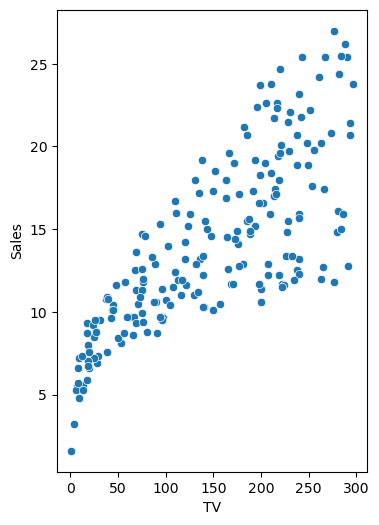

In [18]:
plt.figure(figsize = (4,6))
sns.scatterplot(x = "TV", y = "Sales", data = df)
plt.show()

## Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

### Generic Steps in Model Building using ```sklearn```

Before you read further, it is good to understand the generic structure of modeling using the scikit-learn library. Broadly, the steps to build any model can be divided as follows: 

### Preparing X and y (Independent and Dependent variables)
-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.
-  However, X can be a dataframe as Pandas is built over NumPy.

#### Assign feature variable(Independent variable) to X

In [19]:
X = df[['TV']]

#### Print the first five rows of X

In [20]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


#### Assign response variable(Dependent variable or target variable) to y

In [21]:
y = df['Sales']

#### Split the data into Training and testing Sets

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 100)

In [23]:
# random_state is the seed used by the random number generator, it can be any integer.
# If we don't specify a random state integer, we get different training and test data every time we run the code

In [24]:
train_test_split   #Press Tab to auto-fill the code
#Press Tab+Shift to read the documentationy

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

#### Check the shape of training and testing set

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


### Performing Linear Regression

#### Import LinearRegression from sklearn linear model

In [26]:
from sklearn.linear_model import LinearRegression

#### Create a LinearRegression object

In [27]:
lr = LinearRegression()

#### Train the model (lr) using fit 

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

#### Print the coefficient and Intercept 

In [29]:
print(lr.coef_)
print(lr.intercept_)

[0.04649736]
6.989665857411677


#### Check the score of our model

In [30]:
lr.score(X_train, y_train)

0.6134312469429992

### Make predictions on the testing set

In [35]:
y_pred = lr.predict(X_test)
len(y_pred)
print(y_pred)

[ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747 16.60531965
 13.4620982  16.17754395 17.05169429 17.07029323 12.4391563  17.66080969
  9.60281742 15.72186983 11.04423554 11.36971705 13.95032046 14.90351632
 14.59198401 12.23921766 16.97264878 13.00642408 16.07524976 15.21969836
 15.58702749 17.23303399 17.20978531 10.49091697 15.58702749 12.71349072
 10.1700852  10.19798361 12.61584627 15.74976825  9.31453379 12.59259759
 11.50920913 14.81982107 17.33067844 15.97295557 17.00519693 15.15925179
 14.63848137 17.14933874 12.57864838 11.16047894  7.77547122 18.55820871
 10.27237939  8.76586496 16.405381   14.95466341 10.4816175  13.08546959
 16.78665935  9.05879832  7.78942043  8.17999824 16.17754395 10.9744895 ]


### Plot a graph to check the accuracy of our prediction

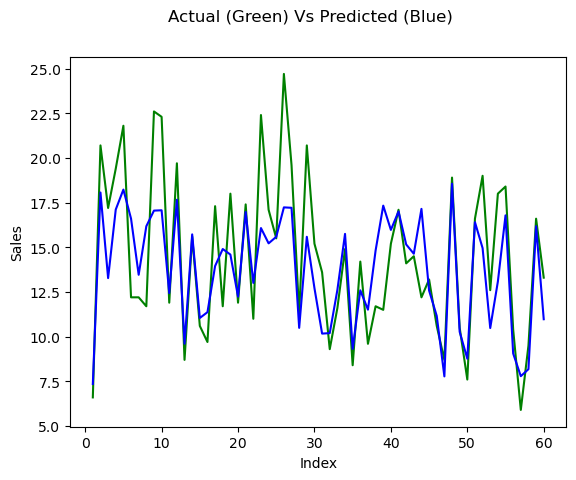

In [32]:
c = [i for i in range(1,61,1)]   #Creating an Index, 61 is used because we have a total of 60 data in our testing set
fig = plt.figure()
plt.plot(c,y_test, color = 'green') # Plotting y test
plt.plot(c,y_pred, color = 'blue') # Plotting predicted values
fig.suptitle('Actual (Green) Vs Predicted (Blue)') # Set title
plt.xlabel('Index') # Set X label
plt.ylabel('Sales') # Set Y label
plt.show()

### Plot a scatterplot of actual values vs predicted

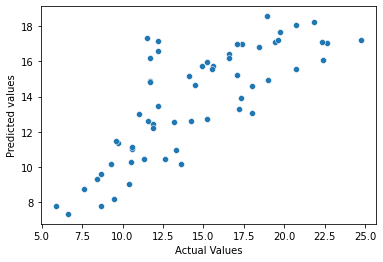

In [36]:
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.show()

### Calculate mean squared error and r2_score

Mean Squared Error:It is the sum, over all the data points, of the square of the difference between the predicted and actual target variables, divided by the number of data points.

y-ypred<sup>2<sup>
    
$$e_i= YPred-Yi$$ 
$$Y pred= mx+c$$
i.e, $$e_1=((m_i*x+c)-y_i)$$
    
i.e, $$e_1^2=(y_1 - (m_i*x+c))^2$$

#### Import mean_squared_error and r2_score from sklearn.metrics

In [30]:
from sklearn.metrics import mean_squared_error,r2_score

#### Calculate the mean squared error

In [33]:
mean_squared_error(y_test, y_pred)

7.97579853285485

#### Calculate r2_score

In [34]:
r2_score(y_test, y_pred)

0.5942987267783302

***

# <center><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></center>